In [1]:
%matplotlib inline

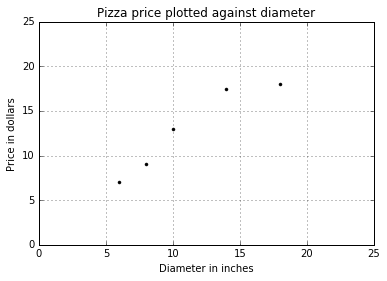

In [3]:
import matplotlib.pyplot as plt
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
# Training data
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
# Create and fit the model
model = LinearRegression()
model.fit(X, y)
print('A 12# pizza shoud cost $%.2f' % model.predict([12])[0])

A 12# pizza shoud cost $13.68


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [5]:
import numpy as np
print('Residual sum of squres: %.2f' % np.mean((model.predict(X) - y) ** 2))

Residual sum of squres: 1.75


In [6]:
from __future__ import division
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar) ** 2 + (8 - xbar) **2 + (10 - xbar) * 2 + (14 - xbar) ** 2 + (18 - xbar) **2) / 4
print(variance)

22.240000000000002


In [7]:
import numpy as np
print(np.var([6, 8, 10, 14, 18], ddof = 1))

23.2


In [8]:
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 - xbar) * (13 - ybar) +
      (14 - xbar) * (17.5 - ybar) + (18 - xbar) * (18 - ybar)) / 4
print(cov)


22.65


In [9]:
from sklearn.linear_model import LinearRegression
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
print('R-squared: %.4f' % model.score(X_test, y_test))

R-squared: 0.6620


In [10]:
from numpy.linalg import inv
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [13]:
from numpy.linalg import lstsq
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(lstsq(X, y)[0])

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [15]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8,2], [9,0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('predicted: %s, Target: %s' % (prediction, y_test[i]))
    
print('R-squared: %.2f' % model.score(X_test, y_test))

predicted: [ 10.0625], Target: [11]
predicted: [ 10.28125], Target: [8.5]
predicted: [ 13.09375], Target: [15]
predicted: [ 18.14583333], Target: [18]
predicted: [ 13.3125], Target: [11]
R-squared: 0.77


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

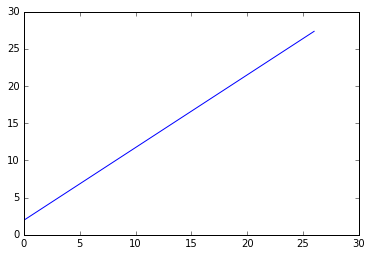

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

In [19]:
quadratic_featurizer = PolynomialFeatures(degree = 2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

In [20]:
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))


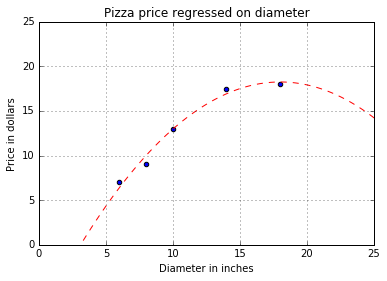

In [23]:
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c = 'r', linestyle = '--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [24]:
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]


In [27]:
print('Simple linear regression r-squared', regressor.score(X_test, y_test))

Simple linear regression r-squared 0.809726797708


In [28]:
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

Quadratic regression r-squared 0.867544365635


In [29]:
import pandas as pd


In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv', sep = ';')

In [31]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


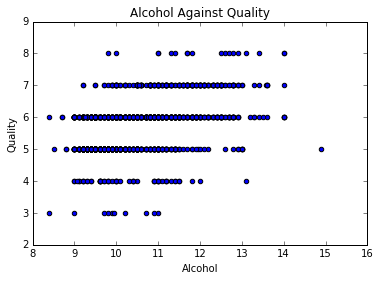

In [33]:
import matplotlib.pylab as plt
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv', sep = ';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)

### External Set

In [35]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_test)
    print('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.320388122205
R-squared: 0.377631676232
R-squared: 0.376943886169
R-squared: 0.361680837529
R-squared: 0.389750174545
R-squared: 0.369284976175
R-squared: 0.262530766503
R-squared: 0.369281718047
R-squared: 0.305402285723
R-squared: 0.313160124104
R-squared: 0.360677552745
R-squared: 0.315857584097
R-squared: 0.373530180013
R-squared: 0.346793510484
R-squared: 0.36023476339
R-squared: 0.295189114776
R-squared: 0.364577237642
R-squared: 0.31670749063
R-squared: 0.294242415107
R-squared: 0.263046012795


In [36]:
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv', sep = ';')
X = df[list(df.columns)[:-1]]
y = df['quality']

### 10-fold Cross Validation

In [37]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    regressor = LinearRegression()
    scores = cross_val_score(regressor, X_train, y_train, cv = 10)
    print(scores.mean())

0.340389275117
0.329191842232
0.340580172108
0.324070181541
0.362942944862
0.346168196438
0.322387581758
0.342058729882
0.33999602072
0.334148053006
0.342845073052
0.350315945532
0.330945103171
0.339859253653
0.326052832339
0.330475499739
0.326749760836
0.328784656214
0.320982466208
0.313846616787


### Training set

In [38]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_predictions = regressor.predict(X_train)
    print('R-squared:', regressor.score(X_train, y_train))
    

R-squared: 0.367231482544
R-squared: 0.369780722453
R-squared: 0.358380372713
R-squared: 0.367169877549
R-squared: 0.355543138506
R-squared: 0.385681256371
R-squared: 0.355785421243
R-squared: 0.337194054275
R-squared: 0.357027381666
R-squared: 0.365774295621
R-squared: 0.371990338737
R-squared: 0.368440800286
R-squared: 0.369096254538
R-squared: 0.360450856267
R-squared: 0.36385011736
R-squared: 0.356758169423
R-squared: 0.371302170667
R-squared: 0.376370639891
R-squared: 0.371505083361
R-squared: 0.378546789606


In [41]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [45]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
    X_scaler = StandardScaler()
    y_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    #y_train = y.scaler.fit_transform(y_train)
    X_test = X_scaler.fit_transform(X_test)
    #y_test = y_scaler.transform(y_test)
    regressor = SGDRegressor(loss = 'squared_loss')
    regressor.fit_transform(X_train, y_train)
    scores = cross_val_score(regressor, X_train, y_train, cv = 5)
    print('Train set r-square score', regressor.score(X_train, y_train))
    print('Cross validation r-square score', scores.mean())
    print('Test set r-square score', regressor.score(X_test, y_test))

//anaconda/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as fe

Train set r-square score 0.731672199687
Cross validation r-square score 0.694853120642
Test set r-square score 0.669566471633
Train set r-square score 0.724154482049
Cross validation r-square score 0.68505816394
Test set r-square score 0.717035246123
Train set r-square score 0.703446330893
Cross validation r-square score 0.644161474226
Test set r-square score 0.733288735625
Train set r-square score 0.730462919876
Cross validation r-square score 0.693996566434
Test set r-square score 0.704860281955
Train set r-square score 0.710526488264
Cross validation r-square score 0.68312730096
Test set r-square score 0.776651424608
Train set r-square score 0.771457659521
Cross validation r-square score 0.737125230048
Test set r-square score 0.569421629906
Train set r-square score 0.76607895085
Cross validation r-square score 0.743839700448
Test set r-square score 0.548370684592
Train set r-square score 0.769334025625
Cross validation r-square score 0.733500790136
Test set r-square score 0.54786174

//anaconda/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [
    {'city': 'New York'},
    {'city': 'San Francisco'},
    {'city': 'Chapel Hill'} ]
print(onehot_encoder.fit_transform(instances).toarray())

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]

In [51]:
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'game': 2, 'basketball': 0, 'unc': 7, 'duke': 1, 'lost': 4, 'the': 6, 'played': 5, 'in': 3}


In [54]:
from sklearn.metrics.pairwise import euclidean_distances
counts  = [
    [0, 1, 1, 0, 0, 1, 0, 1],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0]
]
print('Distance between 1st and 2nd documents:', euclidean_distances(counts[0], counts[1]))

Distance between 1st and 2nd documents: [[ 2.]]


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [56]:
from sklearn import datasets
digits = datasets.load_digits()
print('Digit:', digits.target[0])
print(digits.images[0])
print('Feature vector:\n', digits.images[0].reshape(-1, 64))

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
Feature vector:
 [[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


In [58]:
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

In [59]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/hallr/DAT_SF_19/master/data/SMSSpamCollection.tsv', delimiter = '\t',
                header = None)
print(df.head())

       0                                                  1
0  label                                                msg
1    ham  Go until jurong point, crazy.. Available only ...
2    ham                      Ok lar... Joking wif u oni...
3   spam  Free entry in 2 a wkly comp to win FA Cup fina...
4    ham  U dun say so early hor... U c already then say...


In [60]:
print('Number of spam messages:', df[df[0] == 'spam'][0].count())
print('Number of ham messages:', df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [73]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


In [89]:
predictions[:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

In [90]:
for i in X_test_raw[:5]:
    print(i)

Short But Cute: "Be a good person, but dont try to prove it.." .Gud noon....
No sir. That's why i had an 8-hr trip on the bus last week. Have another audition next wednesday but i think i might drive this time.
Don't b floppy... b snappy & happy! Only gay chat service with photo upload call 08718730666 (10p/min). 2 stop our texts call 08712460324
If you're not in my car in an hour and a half I'm going apeshit
Ding me on ya break fassyole! Blacko from londn


In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4 1]
 [2 3]]


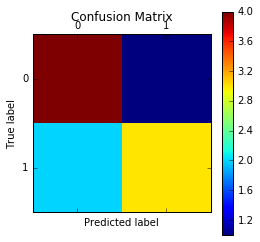

In [93]:
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [94]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
print('Accuracy:', accuracy_score(y_true, y_pred))

Accuracy: 0.5


In [98]:
df.boxplot

<bound method boxplot of           0                                                  1
0     label                                                msg
1       ham  Go until jurong point, crazy.. Available only ...
2       ham                      Ok lar... Joking wif u oni...
3      spam  Free entry in 2 a wkly comp to win FA Cup fina...
4       ham  U dun say so early hor... U c already then say...
5       ham  Nah I don't think he goes to usf, he lives aro...
6      spam  FreeMsg Hey there darling it's been 3 week's n...
7       ham  Even my brother is not like to speak with me. ...
8       ham  As per your request 'Melle Melle (Oru Minnamin...
9      spam  WINNER!! As a valued network customer you have...
10     spam  Had your mobile 11 months or more? U R entitle...
11      ham  I'm gonna be home soon and i don't want to tal...
12     spam  SIX chances to win CASH! From 100 to 20,000 po...
13     spam  URGENT! You have won a 1 week FREE membership ...
14      ham  I've been searchi

In [101]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

In [105]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

In [107]:
for i in range(10):
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
    vectorizer = TfidfVectorizer()
    X_train  = vectorizer.fit_transform(X_train_raw)
    X_test = vectorizer.transform(X_test_raw)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    scores = cross_val_score(classifier, X_train, y_train, cv = 10)
    print(scores.mean())

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.95789347962


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.95836777719


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.957647194212
0.956206766325


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.955972665477
0.96076148776


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.958124018794
0.955970534577


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.960752704577


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.960995553399


In [113]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/apeeyush/machine-learning/master/sentiment-analysis-on-movie-review/data/train.tsv',
                header = 0, delimiter = '\t')

In [114]:
print(df.count())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [115]:
print(df.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [116]:
print(df['Phrase'].head(10))

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object


In [117]:
print(df['Sentiment'].describe())

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64


In [118]:
print(df['Sentiment'].value_counts())

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [119]:
print(df['Sentiment'].value_counts()/df['Sentiment'].count())

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64


In [121]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

//anaconda/lib/python3.5/site-packages/sklearn/metrics/metrics.py:4: DeprecationWarning: sklearn.metrics.metrics is deprecated and will be removed in 0.18. Please import from sklearn.metrics
  DeprecationWarning)


## Mastering Machine Learning with scikit-learn (page 102 of 238)